<a href="https://colab.research.google.com/github/radara09/Tugas-Python/blob/main/Tugas_M13_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RAHMAT HIDAYAT F - 1101194238 - TT-43-G11


In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
frek = [700, 900, 1800]
tipe_pilihan = ['urban', 'suburban', 'open']
ht = 90 #meter
hr = 1.5 #meter
d = np.arange(200,701)

In [12]:
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [13]:
dict_graph1 = {}
 
def grafik1_1800(frek,tipex):
  f1 = frek[2]
  for i in range(len(tipex)):
    tipe = tipex[i]
    #print(tipe)
    for i in range(len(d)):
      PL = cos(f1,tipe,ht,hr,d)
    dict_graph1[tipe]= PL
 
  #print(PL)
  print(dict_graph1)
  #print(dict_g1['urban'])
grafik1_1800(frek,tipex)

{'urban': array([167.24079482, 167.31032477, 167.37950967, 167.44835291,
       167.51685785, 167.5850278 , 167.65286603, 167.72037573,
       167.78756009, 167.85442223, 167.9209652 , 167.98719206,
       168.05310579, 168.11870934, 168.1840056 , 168.24899746,
       168.31368773, 168.37807919, 168.4421746 , 168.50597667,
       168.56948807, 168.63271143, 168.69564936, 168.75830442,
       168.82067915, 168.88277603, 168.94459754, 169.00614611,
       169.06742413, 169.12843398, 169.18917798, 169.24965846,
       169.30987768, 169.36983789, 169.42954131, 169.48899013,
       169.54818652, 169.6071326 , 169.66583049, 169.72428226,
       169.78248998, 169.84045566, 169.89818132, 169.95566894,
       170.01292047, 170.06993784, 170.12672296, 170.18327771,
       170.23960396, 170.29570355, 170.35157828, 170.40722996,
       170.46266036, 170.51787124, 170.57286432, 170.62764131,
       170.68220392, 170.7365538 , 170.79069262, 170.844622  ,
       170.89834356, 170.95185889, 171.005169

In [14]:
dict_graph2 = {}
 
def grafik2_urban(frek,tipex):
  tipe = tipex[0]
  for i in range(len(frek)):
    f2 = frek[i]
    #print(tipe)
    for i in range(len(d)):
      PL = cos(f2,tipe,ht,hr,d)
    dict_graph2[f2]= PL
 
  #print(PL)
  print(dict_graph2)
  #print(dict_g1['urban'])
grafik2_urban(frek,tipex)

{700: array([154.60173732, 154.67126728, 154.74045217, 154.80929541,
       154.87780035, 154.94597031, 155.01380853, 155.08131824,
       155.1485026 , 155.21536473, 155.28190771, 155.34813457,
       155.4140483 , 155.47965184, 155.54494811, 155.60993996,
       155.67463023, 155.7390217 , 155.80311711, 155.86691918,
       155.93043058, 155.99365394, 156.05659187, 156.11924693,
       156.18162165, 156.24371854, 156.30554005, 156.36708861,
       156.42836664, 156.48937648, 156.55012049, 156.61060096,
       156.67082018, 156.73078039, 156.79048382, 156.84993264,
       156.90912902, 156.9680751 , 157.02677299, 157.08522477,
       157.14343248, 157.20139817, 157.25912383, 157.31661145,
       157.37386298, 157.43088035, 157.48766547, 157.54422022,
       157.60054647, 157.65664605, 157.71252079, 157.76817247,
       157.82360287, 157.87881374, 157.93380682, 157.98858382,
       158.04314642, 158.09749631, 158.15163512, 158.2055645 ,
       158.25928607, 158.3128014 , 158.36611209, 

In [25]:
#PLOT GRAFIK 1
def graph_1():
  plt.figure()
  plt.plot(d,dict_graph1['urban'],'b', label='Urban')
  plt.plot(d,dict_graph1['open'],'r', label='Open')
  plt.plot(d,dict_graph1['suburban'],'g', label='Suburban')
  plt.legend()
  plt.title("Frekuensi 1800 MHz")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Path Loss (dB)")
  plt.show()
 
#PLOT GRAFIK 2
def graph_2():
  plt.figure()
  plt.plot(d,dict_graph2[700],'b', label='700 MHz')
  plt.plot(d,dict_graph2[900],'r', label='900 MHz')
  plt.plot(d,dict_graph2[1800],'g', label='1800 MHz')
  plt.legend()
  plt.title("Model Urban")
  plt.xlabel("Jarak (m)")
  plt.ylabel("Path Loss (dB)")
  plt.show()

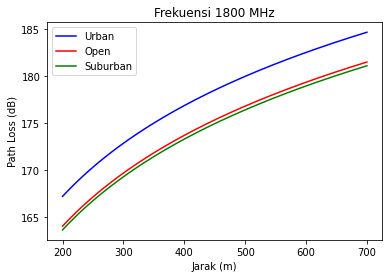

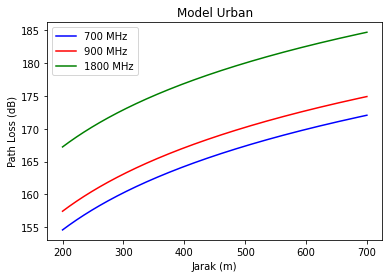

In [26]:
graph_1()
graph_2()